# I. Réduction de dimensions et Visualisation des données

## 1.  imports du jeu de données

In [20]:
import numpy as np
np.set_printoptions(threshold=10000,suppress=True)
import pandas as pd
import warnings
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')

In [21]:
data = pd.read_csv('./villes.csv', sep=';')
X = data.iloc[:, 1:13].values
labels = data.iloc[:, 0].values

## 2. Analyse des composantes principales

In [22]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

Variance expliquée par chaque composante principale :
[10.80999558  1.45184229  0.0581652   0.03279996  0.01406283  0.00621041
  0.00523837  0.00406512  0.00187861  0.00145726  0.0010361   0.00034505]

Ratio de variance expliquée par chaque composante principale :
[0.87268193 0.11720602 0.00469563 0.00264791 0.00113528 0.00050136
 0.00042289 0.00032817 0.00015166 0.00011764 0.00008364 0.00002786]

Composantes principales (axes) :
[[ 0.27151028  0.28846164  0.3010811   0.30354174  0.28353089  0.27841907
   0.27290295  0.28757774  0.30472022  0.3038548   0.29242808  0.2729549 ]
 [ 0.39933494  0.29907184  0.12943051 -0.11530598 -0.32314291 -0.35846763
  -0.38879639 -0.3010133  -0.11231622  0.12249226  0.26269461  0.38693688]]
nb axes:  2


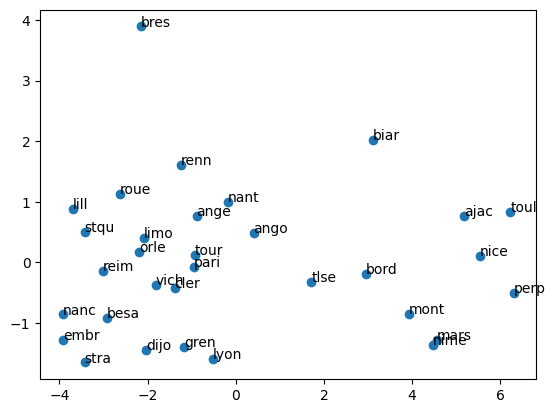

In [23]:

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

pca = PCA()
X_pca = pca.fit_transform(X_scaled)

explained_variance = pca.explained_variance_
explained_variance_ratio = pca.explained_variance_ratio_
print("Variance expliquée par chaque composante principale :")
print(explained_variance)
print("\nRatio de variance expliquée par chaque composante principale :")
print(explained_variance_ratio)
components = pca.components_
print("\nComposantes principales (axes) :")
print(components[:2])

pourcentage_cumulatif = np.cumsum(explained_variance) / np.sum(explained_variance)
nombre_axes_necessaires = np.argmax(pourcentage_cumulatif >= 0.90) + 1
print("nb axes: ", nombre_axes_necessaires)

plt.scatter(X_pca[:, 0], X_pca[:, 1])
for label, x, y in zip(labels, X_pca[:, 0], X_pca[:, 1]):
    plt.annotate(label, xy=(x, y), xytext=(-0.2, 0.2), textcoords='offset points')
plt.show()


## 3.  Réaliser une Analyse en Composantes Principales pour mammals.csv

Variance expliquée par chaque composante principale :
[3.89128262 1.87874604 0.99367427 0.5848547  0.43285343 0.22193945
 0.0959097  0.03188734]

Ratio de variance expliquée par chaque composante principale :
[0.478565   0.23105546 0.12220591 0.07192769 0.05323399 0.02729497
 0.01179535 0.00392163]

Composantes principales (axes) :
[[ 0.27151028  0.28846164  0.3010811   0.30354174  0.28353089  0.27841907
   0.27290295  0.28757774  0.30472022  0.3038548   0.29242808  0.2729549 ]
 [ 0.39933494  0.29907184  0.12943051 -0.11530598 -0.32314291 -0.35846763
  -0.38879639 -0.3010133  -0.11231622  0.12249226  0.26269461  0.38693688]]
nb axes:  4


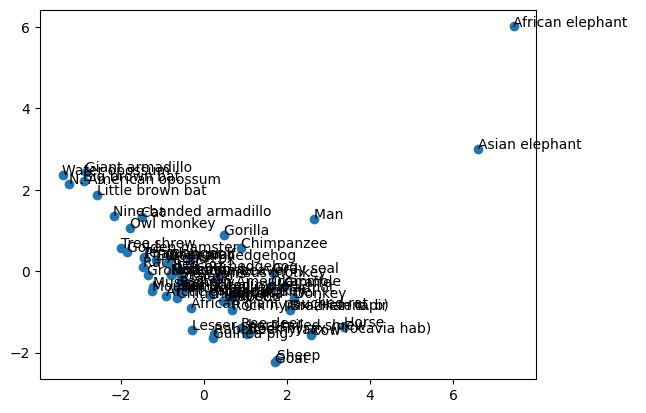

In [24]:
data = pd.read_csv('./mammals.csv', sep=';')
X = data.iloc[:, 1:9].values
labels = data.iloc[:, 0].values

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

pca = PCA()

X_pca = pca.fit_transform(X_scaled)


explained_variance = pca.explained_variance_
explained_variance_ratio = pca.explained_variance_ratio_
print("Variance expliquée par chaque composante principale :")
print(explained_variance)

print("\nRatio de variance expliquée par chaque composante principale :")
print(explained_variance_ratio)

print("\nComposantes principales (axes) :")
print(components[:2])


pourcentage_cumulatif = np.cumsum(explained_variance) / np.sum(explained_variance)
nombre_axes_necessaires = np.argmax(pourcentage_cumulatif >= 0.90) + 1
print("nb axes: ", nombre_axes_necessaires)

plt.scatter(X_pca[:, 0], X_pca[:, 1])
for label, x, y in zip(labels, X_pca[:, 0], X_pca[:, 1]):
    plt.annotate(label, xy=(x, y), xytext=(-0.2, 0.2), textcoords='offset points')
plt.show()


## 4.  Réaliser une Analyse en Composantes Principales pour crimes.csv


Variance expliquée par chaque composante principale :
[3.89991139 1.07797094 0.49604031 0.287139   0.22709231 0.13429503]

Ratio de variance expliquée par chaque composante principale :
[0.63698553 0.17606859 0.08101992 0.04689937 0.03709174 0.02193486]

Composantes principales (axes) :
[[ 0.33888672  0.45987727  0.39765646  0.42793592  0.44838461  0.36243637]
 [ 0.64564498  0.04026407  0.04440289  0.27868246 -0.32636669 -0.62878504]]
nb axes:  4


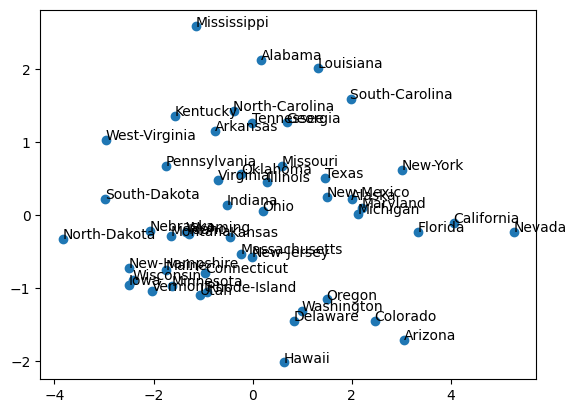

In [25]:
data = pd.read_csv('./crimes.csv', sep=';')
X = data.iloc[:, 1:7].values
labels = data.iloc[:, 0].values

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

pca = PCA()
X_pca = pca.fit_transform(X_scaled)

explained_variance = pca.explained_variance_
explained_variance_ratio = pca.explained_variance_ratio_
print("Variance expliquée par chaque composante principale :")
print(explained_variance)
print("\nRatio de variance expliquée par chaque composante principale :")
print(explained_variance_ratio)

components = pca.components_
print("\nComposantes principales (axes) :")
print(components[:2])

pourcentage_cumulatif = np.cumsum(explained_variance) / np.sum(explained_variance)
nombre_axes_necessaires = np.argmax(pourcentage_cumulatif >= 0.90) + 1
print("nb axes: ", nombre_axes_necessaires)

plt.scatter(X_pca[:, 0], X_pca[:, 1])
for label, x, y in zip(labels, X_pca[:, 0], X_pca[:, 1]):
    plt.annotate(label, xy=(x, y), xytext=(-0.2, 0.2), textcoords='offset points')
plt.show()

# II. Clustering

## 1. Application de la procedure KMeans afin dóbtenir les trois clusters


In [28]:
data = pd.read_csv('./villes.csv', sep=';')
X = data.iloc[:, 1:13].values
labels = data.iloc[:, 0].values

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

pca = PCA()
X_pca = pca.fit_transform(X_scaled)


from sklearn.cluster import KMeans
import matplotlib.colors as plt_colors

kmeans = KMeans(n_clusters=3, random_state=0)
clustering = kmeans.fit_predict(X_pca)

colors = ['red','yellow','blue','pink']
plt.scatter(X_pca[:, 0], X_pca[:, 1], c= clustering, cmap=colors.ListedColormap(colors))
for label, x, y in zip(labels, X_pca[:, 0], X_pca[:, 1]):
  plt.annotate(label, xy=(x, y), xytext=(-0.2, 0.2), textcoords='offset points')
plt.show()


AttributeError: module 'matplotlib' has no attribute 'scatter'

## 2. Application de la procedure AgglomerativeClustering et comparaison des différentes méthodes d’agrégation

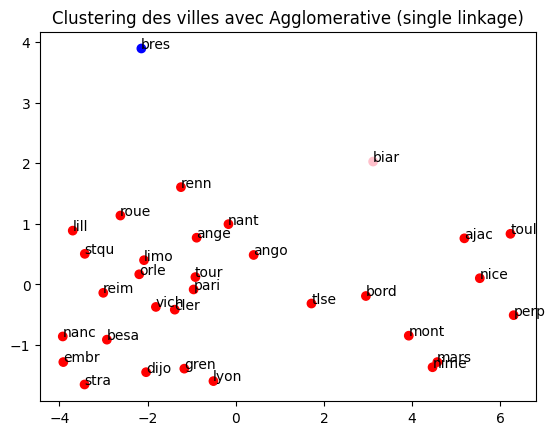

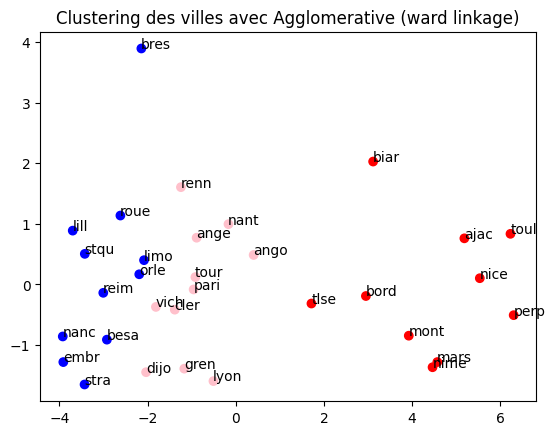

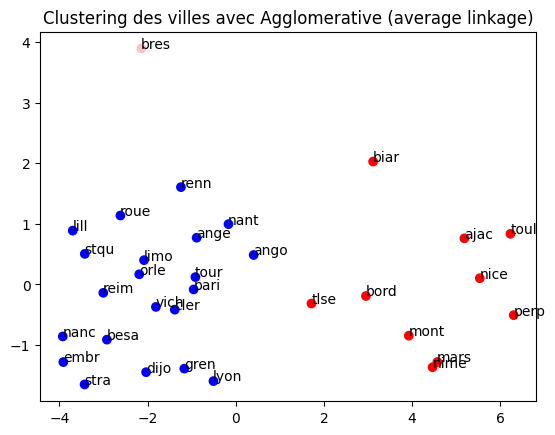

In [50]:
from sklearn.cluster import AgglomerativeClustering

methods = ['single', 'ward', 'average']

for method in methods:
    clustering = AgglomerativeClustering(n_clusters=3, linkage=method)
    cluster_labels = clustering.fit_predict(X_pca)

    plt.scatter(X_pca[:, 0], X_pca[:, 1], c=cluster_labels, cmap=matplotlib.colors.ListedColormap(colors))
    for label, x, y in zip(labels, X_pca[:, 0], X_pca[:, 1]):
        plt.annotate(label, xy=(x, y), xytext=(-0.2, 0.2), textcoords='offset points')
    plt.title(f'Clustering des villes avec Agglomerative ({method} linkage)')
    plt.show()


## 3. Deduction de la meilleure partition

In [53]:
from sklearn import metrics
import numpy as np

silhouette_scores = []
davies_bouldin_scores = []

for i in range(2, 10):
    clustering = KMeans(n_clusters=i, random_state=0).fit_predict(X)

    silhouette_score = metrics.silhouette_score(X, clustering, metric='euclidean')
    davies_bouldin_score = metrics.davies_bouldin_score(X, clustering)

    silhouette_scores.append(silhouette_score)
    davies_bouldin_scores.append(davies_bouldin_score)

    print(f"Nombre de clusters : {i}")
    print(f"Score Silhouette : {silhouette_score}")
    print(f"Score Davies-Bouldin : {davies_bouldin_score}")

best_num_clusters = np.argmax(silhouette_scores) + 2  # +2 car nous avons commencé à partir de 2 clusters
print(f"Meilleur nombre de clusters selon le score Silhouette : {best_num_clusters}")


Nombre de clusters : 2
Score Silhouette : 0.6181156437258204
Score Davies-Bouldin : 0.5255144256507587

Nombre de clusters : 3
Score Silhouette : 0.40912000832289414
Score Davies-Bouldin : 0.8384526344874095

Nombre de clusters : 4
Score Silhouette : 0.34940432501232543
Score Davies-Bouldin : 0.9119666169933769

Nombre de clusters : 5
Score Silhouette : 0.32075396348111507
Score Davies-Bouldin : 0.9448103604083643

Nombre de clusters : 6
Score Silhouette : 0.33055105501053395
Score Davies-Bouldin : 0.7214057702448207

Nombre de clusters : 7
Score Silhouette : 0.37471269489810893
Score Davies-Bouldin : 0.6867225413365156

Nombre de clusters : 8
Score Silhouette : 0.39908586214614683
Score Davies-Bouldin : 0.6563006870615523

Nombre de clusters : 9
Score Silhouette : 0.4071115201359237
Score Davies-Bouldin : 0.5406589932019961

Meilleur nombre de clusters selon le score Silhouette : 2


## 5. Fonction pour determiner le meilleurs algorithme et la taille la plus optimale pour faire le cluster

In [85]:
def compare_clustering_algorithms(X, num_clusters_range=None):
    if num_clusters_range is None:
        num_clusters_range = range(2, 10)
    algorithms = [
        {'name': 'K-Means', 'clusterer': KMeans},
        {'name': 'Agglomerative (Single)', 'clusterer': AgglomerativeClustering, 'linkage': 'single'},
        {'name': 'Agglomerative (Ward)', 'clusterer': AgglomerativeClustering, 'linkage': 'ward'},
        {'name': 'Agglomerative (Average)', 'clusterer': AgglomerativeClustering, 'linkage': 'average'}
    ]
    best_score = -1
    best_algorithm = None
    best_num_clusters = -1
    for algorithm_info in algorithms:
        for num_clusters in num_clusters_range:
            if 'linkage' in algorithm_info:
                clusterer = algorithm_info['clusterer'](n_clusters=num_clusters, linkage=algorithm_info['linkage'])
            else:
                clusterer = algorithm_info['clusterer'](n_clusters=num_clusters)
            clustering = clusterer.fit_predict(X)
            silhouette_score = metrics.silhouette_score(X, clustering, metric='euclidean')
            davies_bouldin_score = metrics.davies_bouldin_score(X, clustering)
            score = silhouette_score
            if score > best_score:
                best_score = score
                best_algorithm = algorithm_info['name']
                best_num_clusters = num_clusters
    return best_algorithm, best_num_clusters

